In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/final/pat_adm_lab_vital.csv')
df.head()

,patientunitstayid,aki_label,aki_offset,organsys_Cardiovascular,organsys_Gastrointestinal,organsys_Genitourinary,organsys_Hematology,organsys_Metabolic/Endocrine,organsys_Musculoskeletal/Skin,organsys_Neurologic,...,delta_result_sodium,min_sao2,max_sao2,mean_sao2,min_heartrate,max_heartrate,mean_heartrate,min_respiration,max_respiration,mean_respiration
0,141284,0,NaN,0,0,0,1,0,0,0,...,0.0,92.0,100.0,96.073529,70.0,106.0,84.752613,10.0,36.0,21.254355
1,141288,0,NaN,1,0,0,0,0,0,0,...,0.0,90.0,100.0,95.219512,80.0,106.0,91.857143,11.0,46.0,21.972125
2,141360,0,NaN,0,0,0,0,0,0,1,...,0.0,96.0,100.0,98.602230,76.0,120.0,89.808118,11.0,36.0,17.656827
3,141362,0,NaN,0,1,0,0,0,0,0,...,2.0,80.0,99.0,93.338129,92.0,120.0,103.592982,11.0,42.0,24.518182
4,141415,0,NaN,1,0,0,0,0,0,0,...,2.0,97.0,100.0,98.353488,61.0,99.0,72.034722,8.0,57.0,15.880000


In [3]:
# keep track of index columns
index_cols = ['patientunitstayid'] # currently used as index

# keep track of cols important for stratification
strat_cols = ['unitvisitnumber', 'aki_label', 'unitdischargestatus_Alive']

# keep track of columns important for time tracking
time_cols = ['aki_offset', 'unitdischargeoffset']

# keep track of numerical columns
num_cols = ['age', 'min_result_BUN', 'min_result_Hct',
       'min_result_Hgb', 'min_result_RBC', 'min_result_WBC x 1000',
       'min_result_bicarbonate', 'min_result_calcium', 'min_result_chloride',
       'min_result_creatinine', 'min_result_glucose',
       'min_result_platelets x 1000', 'min_result_potassium',
       'min_result_sodium', 'max_result_BUN', 'max_result_Hct',
       'max_result_Hgb', 'max_result_RBC', 'max_result_WBC x 1000',
       'max_result_bicarbonate', 'max_result_calcium', 'max_result_chloride',
       'max_result_creatinine', 'max_result_glucose',
       'max_result_platelets x 1000', 'max_result_potassium',
       'max_result_sodium', 'delta_result_BUN', 'delta_result_Hct',
       'delta_result_Hgb', 'delta_result_RBC', 'delta_result_WBC x 1000',
       'delta_result_bicarbonate', 'delta_result_calcium',
       'delta_result_chloride', 'delta_result_creatinine',
       'delta_result_glucose', 'delta_result_platelets x 1000',
       'delta_result_potassium', 'delta_result_sodium']

# keep track of categorical columns
cat_cols = ['organsys_Cardiovascular', 'organsys_Gastrointestinal',
       'organsys_Genitourinary', 'organsys_Hematology',
       'organsys_Metabolic/Endocrine', 'organsys_Musculoskeletal/Skin',
       'organsys_Neurologic', 'organsys_Respiratory', 'organsys_Trauma',
       'from_or_Yes', 'gender_Female', 'ethnicity_African American',
       'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Other/Unknown', 'unittype_CCU-CTICU', 'unittype_CSICU',
       'unittype_Cardiac ICU', 'unittype_MICU', 'unittype_Med-Surg ICU',
       'unittype_Neuro ICU', 'unittype_SICU']

# keep track of target variables
target_cols = ['aki_label', 'unitdischargestatus_Alive']

In [4]:
df[df.aki_label==1].unitvisitnumber.value_counts()

1     1879
2      176
3       29
4       14
10       1
Name: unitvisitnumber, dtype: int64

In [5]:
df[df.aki_label==0].unitvisitnumber.value_counts()

1     67822
2      5246
3      1024
4       270
5        98
6        39
7        15
9         5
8         5
10        1
Name: unitvisitnumber, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
random_state = 2020

# for now to the training on first admissions, will incorporate statified split for later visits next
df_1st_visit = df[df.unitvisitnumber==1]

# define explanatory and target arrays
X_y_label_offset = df_1st_visit[num_cols + cat_cols+['aki_label', 'aki_offset']]

# split into train-test
X_train_df, X_test_df = train_test_split(X_y_label_offset, test_size=0.2, random_state=random_state, \
                                                          stratify=X_y_label_offset['aki_label'])

In [110]:
X_train_df

,age,min_result_BUN,min_result_Hct,min_result_Hgb,min_result_RBC,min_result_WBC x 1000,min_result_bicarbonate,min_result_calcium,min_result_chloride,min_result_creatinine,...,ethnicity_Other/Unknown,unittype_CCU-CTICU,unittype_CSICU,unittype_Cardiac ICU,unittype_MICU,unittype_Med-Surg ICU,unittype_Neuro ICU,unittype_SICU,aki_label,aki_offset
41940,70,34.0,36.0,12.2,4.31,14.9,NaN,8.9,104.0,0.70,...,0,0,0,0,0,1,0,0,0,NaN
28641,69,10.0,40.5,13.6,4.21,8.6,20.0,8.6,99.0,0.61,...,0,0,0,0,0,1,0,0,0,NaN
63895,39,10.0,43.2,14.4,4.46,12.6,28.0,8.0,102.0,0.64,...,0,1,0,0,0,0,0,0,0,NaN
3703,47,5.0,41.8,14.8,4.09,5.5,24.0,10.1,91.0,0.70,...,0,0,0,0,0,1,0,0,0,NaN
42407,77,15.0,25.5,8.1,2.66,8.8,31.0,8.9,102.0,0.90,...,0,0,0,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49239,54,14.0,40.2,13.2,4.48,7.7,26.0,9.6,100.0,0.81,...,0,0,0,0,0,1,0,0,0,NaN
38708,81,20.0,41.5,13.7,4.50,13.1,23.0,8.8,104.0,1.09,...,0,0,0,0,0,1,0,0,0,NaN
64584,57,25.0,38.6,13.9,4.78,14.5,9.0,8.6,93.0,0.96,...,0,0,0,0,1,0,0,0,0,NaN
76199,55,21.0,19.0,6.6,2.07,7.9,22.0,7.8,108.0,0.84,...,0,0,0,1,0,0,0,0,0,NaN


In [89]:
pd.set_option('mode.chained_assignment', None)

# skale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_df[num_cols] = scaler.fit_transform(X_train_df[num_cols])
X_test_df[num_cols] = scaler.transform(X_test_df[num_cols])

X_train = X_train_df.values
X_test = X_test_df.values

In [43]:
# write a sample of 5 positive and 5 negative pateints to use for the demo
df_sample_1 = X_test_df[y_test==1].head()
df_sample_0 = X_test_df[y_test==0].head()
df_sample_combined = pd.concat([df_sample_1, df_sample_0], axis=0)
df_sample_combined

,age,min_result_BUN,min_result_Hct,min_result_Hgb,min_result_RBC,min_result_WBC x 1000,min_result_bicarbonate,min_result_calcium,min_result_chloride,min_result_creatinine,...,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Other/Unknown,unittype_CCU-CTICU,unittype_CSICU,unittype_Cardiac ICU,unittype_MICU,unittype_Med-Surg ICU,unittype_Neuro ICU,unittype_SICU
41560,-1.622333,-0.755376,0.185520,0.318982,-0.389489,0.077844,-0.620186,-0.215308,-0.473097,-0.335431,...,0,0,1,0,0,0,0,1,0,0
1878,0.823921,-0.181409,-1.740625,-1.596322,-1.710270,-1.020495,1.241475,0.554127,-0.029858,-0.025486,...,1,0,0,0,0,0,0,0,1,0
33936,0.585262,-0.039688,0.365294,0.281427,-0.015462,-0.673995,0.124478,1.543399,0.708874,-0.011398,...,1,0,0,0,0,0,0,0,1,0
8844,0.346603,1.448374,0.994501,1.107637,0.428694,-0.157515,0.310644,-0.874823,-0.029858,0.368988,...,1,0,0,0,0,0,1,0,0,0
76316,1.062580,0.810633,0.262566,0.281427,0.113109,0.653164,0.124478,-0.874823,-0.473097,0.988877,...,1,0,0,0,0,1,0,0,0,0
53183,1.002915,-0.323129,-1.278350,-1.258327,-1.312867,-0.693608,-0.247854,-1.754177,0.413381,-0.166370,...,1,0,0,0,0,0,0,1,0,0
26783,-0.071050,1.023213,0.545067,0.469202,0.405318,-0.033298,0.124478,0.114450,1.004367,-0.152282,...,0,1,0,0,0,0,0,1,0,0
25224,0.107944,-0.323129,0.403817,0.469202,0.241681,-0.301345,-0.434020,-0.545065,0.413381,-0.180459,...,0,0,1,0,0,0,1,0,0,0
2093,0.465933,-0.606569,0.211202,0.356537,0.183239,0.064768,0.124478,-0.215308,-0.029858,-0.208635,...,1,0,0,0,0,0,0,0,1,0
56547,0.764256,0.314612,-0.931644,-0.920332,-0.915464,-0.419024,-0.620186,-0.764904,0.561128,-0.307254,...,0,0,1,0,0,0,0,1,0,0


In [51]:
#df_sample_combined.to_csv('../data/final/df_sample.csv', index=False)
#df_sample = pd.read_csv('../data/final/df_sample.csv')
#df_sample.head()
df_sample.loc[0]

age                     -1.622333
min_result_BUN          -0.755376
min_result_Hct           0.185520
min_result_Hgb           0.318982
min_result_RBC          -0.389489
                           ...   
unittype_Cardiac ICU     0.000000
unittype_MICU            0.000000
unittype_Med-Surg ICU    1.000000
unittype_Neuro ICU       0.000000
unittype_SICU            0.000000
Name: 0, Length: 63, dtype: float64

In [8]:
SEED=2020
# import datetime
from datetime import datetime

# import a host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# import model metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# import ROC_AUC scoring, we will use area under the ROC curve for comparison
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True, class_weight='balanced')
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=1, random_state=SEED, solver='liblinear', class_weight='balanced')
    nn = MLPClassifier((100, 50), early_stopping=True, random_state=SEED, max_iter=400, activation='tanh')
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED, class_weight='balanced')

    models = {#'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list, xtrain, ytrain, xtest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        current_time = datetime.now() 
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        time_elapsed = datetime.now() - current_time
        print("Time elapsed ", time_elapsed)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        ap = average_precision_score(y, P.loc[:, m])
        print("%-26s: %.3f, %.3f" % (m, score, ap))
    print("Done.\n")

In [9]:
X_train_df = X_train_df.fillna(X_train_df.median())
X_test_df = X_test_df.fillna(X_test_df.median())

In [11]:
X_train = X_train_df.values
X_test = X_test_df.values

models = get_models()
P = train_predict(models, X_train, y_train, X_test)
score_models(P, y_test)

Fitting models.
knn... Time elapsed  0:02:01.706390
done
naive bayes... Time elapsed  0:00:00.089425
done
mlp-nn... Time elapsed  0:00:05.099880
done
random forest... Time elapsed  0:00:00.632264
done
gbm... Time elapsed  0:00:26.865629
done
logistic... Time elapsed  0:00:04.851796
done
Done.

Scoring models.
knn                       : 0.554, 0.037
naive bayes               : 0.698, 0.071
mlp-nn                    : 0.771, 0.114
random forest             : 0.583, 0.039
gbm                       : 0.779, 0.116
logistic                  : 0.757, 0.100
Done.



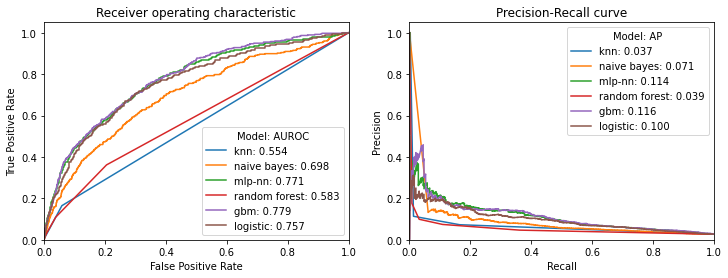

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))    
for column in P.columns:
    roc_auc = roc_auc_score(y_test, P[column])
    fpr, tpr, _ = roc_curve(y_test, P[column])
    ax[0].plot(fpr, tpr, label='%s: %0.3f' % (column, roc_auc))

    precision, recall, _ = precision_recall_curve(y_test, P[column])
    ave_prec_rec = average_precision_score(y_test, P[column])
    ax[1].plot(recall, precision, label='%s: %0.3f' % (column, ave_prec_rec))  

    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver operating characteristic')
    ax[0].legend(loc="lower right", title="Model: AUROC")

    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall curve')
    ax[1].legend(loc="upper right", title="Model: AP")
    
#plt.savefig('../reports/figures/mult_models_after_feat_select.png', format='png')

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

fs = SelectKBest(mutual_info_classif, k=40)
X_train_red = fs.fit_transform(X_train, y_train)
X_test_red = fs.transform(X_test)
print(X_train_red.shape)
print(X_test_red.shape)

(55760, 40)
(13941, 40)


In [31]:
models = get_models()
P = train_predict(models, X_train_red, y_train, X_test_red)
score_models(P, y_test)

Fitting models.
knn... Time elapsed  0:01:16.050628
done
naive bayes... Time elapsed  0:00:00.056235
done
mlp-nn... Time elapsed  0:00:04.259117
done
random forest... Time elapsed  0:00:00.650665
done
gbm... Time elapsed  0:00:18.500365
done
logistic... Time elapsed  0:00:01.748002
done
Done.

Scoring models.
knn                       : 0.537, 0.032
naive bayes               : 0.711, 0.075
mlp-nn                    : 0.752, 0.094
random forest             : 0.613, 0.049
gbm                       : 0.775, 0.120
logistic                  : 0.761, 0.098
Done.



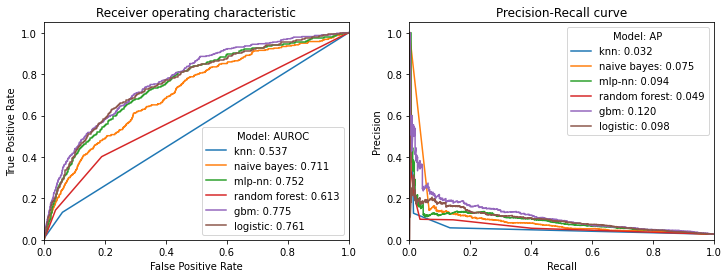

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))    
for column in P.columns:
    roc_auc = roc_auc_score(y_test, P[column])
    fpr, tpr, _ = roc_curve(y_test, P[column])
    ax[0].plot(fpr, tpr, label='%s: %0.3f' % (column, roc_auc))

    precision, recall, _ = precision_recall_curve(y_test, P[column])
    ave_prec_rec = average_precision_score(y_test, P[column])
    ax[1].plot(recall, precision, label='%s: %0.3f' % (column, ave_prec_rec))  

    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('Receiver operating characteristic')
    ax[0].legend(loc="lower right", title="Model: AUROC")

    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_ylim([0.0, 1.05])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('Precision-Recall curve')
    ax[1].legend(loc="upper right", title="Model: AP")

In [38]:
X_train_df.to_csv('../data/final/X_train_df.csv')
X_test_df.to_csv('../data/final/X_test_df.csv')
y_train_ser = pd.Series(y_train)
y_train_ser.to_csv('../data/final/y_train_ser.csv', index=False)
y_test_ser = pd.Series(y_test)
y_test_ser.to_csv('../data/final/y_test_ser.csv', index=False)

In [94]:
X_train_df = X_train_df.fillna(X_train_df.median())
X_test_df = X_test_df.fillna(X_test_df.median())
X_train = X_train_df.values
X_test = X_test_df.values

In [96]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [97]:
X_y_pred_test = pd.concat([X_test_df, pd.Series(y_test), pd.Series(y_pred)], axis=1, ignore_index=True)
X_y_pred_test

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352870,-2.338309,-0.677429,2.445531,2.910276,2.824802,0.012466,-0.806352,2.202915,-0.473097,-0.363608,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
3352878,-0.071050,-0.393989,-1.021531,-0.882777,-1.406374,-0.079062,-0.434020,-0.435146,1.743099,0.242193,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3352970,1.122245,0.243752,-1.278350,-1.333437,-1.044035,0.901598,0.869143,-0.215308,-0.029858,-0.152282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3353197,0.167609,-0.039688,-1.791989,-1.558767,-1.745335,-0.549778,-0.061688,-1.094661,-0.620844,-0.419961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [92]:
X_test.shape

(13941, 63)